# AWS micro ETL sample
This sample uses publicly available data from the [HM land registry](https://www.gov.uk/government/organisations/land-registry) containing average price by property type series.  
You can customise the file with your own data source.

## Import required libraries

In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

## Define URL to query

In [18]:
URL = 'http://publicdata.landregistry.gov.uk/market-trend-data/house-price-index-data/Average-prices-Property-Type-2019-04.csv'

## Print response header
You can use the following code to print the `Content-Length` header which indicates the size of the entity body in the message, in bytes.
In addition, you can see weather the server is supports partial request: `'Accept-Ranges': 'bytes'` or `none`

In [3]:
head = requests.head(URL)
print('Total bytes:', head.headers['Content-Length'])
print('Accept ranges:', head.headers['Accept-Ranges'])

Total bytes: 27137098
Accept ranges: bytes


## Partial requests
If the file is too big, the micro ETL process is more likely to exaust the resources or go in timeout.  
For that reason, if the server accept partial request you can use the following function defining a `start` and `end` range of bytes you would like to retrieve.

Example of accepted value from the below function:  
- `range_header(0, 499)` which results in `Range: bytes=0-499` to fetch the first 499 bytes
- `range_header(100, 300)` which results in `Range: bytes=100-300` to fetch from the 100 to the 300 bytes
- `range_header(-500)` which results in `Range: bytes=-500` to fetch the last 500 bytes

In [4]:
def range_header(start=0, end=0):    
    if start < 0 and end == 0:
        byte_range = 'bytes=%s' % (start)
    else:        
        byte_range = 'bytes=%s-%s' % (start, end)

    return {'Range': byte_range}

## If you want to get part of the file
If you want to get part of the file, use a statement similar to the one below.

In [6]:
# Fetches the first 10000000 bytes
res = requests.get(URL, headers=range_header(0, 10000000), allow_redirects=True)

# Import the data in a pandas DataFrame from the IO stream (without the need of creating a file)
df = pd.read_csv(io.StringIO(res.content.decode('utf-8')), engine='python', error_bad_lines=False)

# Number of elements in the array.
df.size

867236

__NOTE__ When you deal with partial file, it is very likely that the last element in the list contains empty values as `NaN`
You might want to remove the last element either with: `df.drop(df.tail(1).index,inplace=True)` or using the `skipfooter=1` parameter inside the `pd.read_csv` call

## If you want to get the full file
Pandas is a great library and allows you to create a DataFrame directly from a URL.

In [5]:
df = pd.read_csv(URL)

# Number of elements in the array.
df.size

2311312

In [6]:
#DataFrame headers
df.columns

Index(['Date', 'Region_Name', 'Area_Code', 'Detached_Average_Price',
       'Detached_Index', 'Detached_Monthly_Change', 'Detached_Annual_Change',
       'Semi_Detached_Average_Price', 'Semi_Detached_Index',
       'Semi_Detached_Monthly_Change', 'Semi_Detached_Annual_Change',
       'Terraced_Average_Price', 'Terraced_Index', 'Terraced_Monthly_Change',
       'Terraced_Annual_Change', 'Flat_Average_Price', 'Flat_Index',
       'Flat_Monthly_Change', 'Flat_Annual_Change'],
      dtype='object')

## What if my source is a JSON file
As you can imagine pandas supports different type of sources JSON included.

`pd.read_json('file_or_url.json')`

[See the official documentation for more info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)

## What if my source is an Excel file
No problem at all pandas supports xls, xlsx, xlsm, xlsb, and odf file extensions read from a local filesystem or URL.

`pd.read_excel('file_or_url.xlsx')`

[See the official documentation for more info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

## Inspect the data

In [7]:
# Columns in the array
df.columns

Index(['Date', 'Region_Name', 'Area_Code', 'Detached_Average_Price',
       'Detached_Index', 'Detached_Monthly_Change', 'Detached_Annual_Change',
       'Semi_Detached_Average_Price', 'Semi_Detached_Index',
       'Semi_Detached_Monthly_Change', 'Semi_Detached_Annual_Change',
       'Terraced_Average_Price', 'Terraced_Index', 'Terraced_Monthly_Change',
       'Terraced_Annual_Change', 'Flat_Average_Price', 'Flat_Index',
       'Flat_Monthly_Change', 'Flat_Annual_Change'],
      dtype='object')

In [8]:
# Last element
df.tail(1) 

,Date,Region_Name,Area_Code,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
121647,2019-04-01,United Kingdom,K02000001,349793.3352,121.569447,1.016012,2.666747,216938.0257,121.343178,0.220195,1.982323,186586.6011,120.794447,1.497215,1.856394,199018.4518,115.627829,0.060925,-1.569053


In [11]:
# First element
df.head(1)

,Date,Region_Name,Area_Code,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
0,1995-01-01,England,E92000001,86314.15895,28.257874,NaN,NaN,51533.22543,27.436474,NaN,NaN,41489.82431,25.279664,NaN,NaN,45218.54082,23.762969,NaN,NaN


In [12]:
# Show only the first 3 row for Scotland
df[df['Region_Name'] == 'Scotland'].head(3)

,Date,Region_Name,Area_Code,Detached_Average_Price,Detached_Index,Detached_Monthly_Change,Detached_Annual_Change,Semi_Detached_Average_Price,Semi_Detached_Index,Semi_Detached_Monthly_Change,Semi_Detached_Annual_Change,Terraced_Average_Price,Terraced_Index,Terraced_Monthly_Change,Terraced_Annual_Change,Flat_Average_Price,Flat_Index,Flat_Monthly_Change,Flat_Annual_Change
42553,2004-01-01,Scotland,S92000003,144192.8664,62.044837,NaN,NaN,82319.95238,58.637191,NaN,NaN,62204.98712,55.210862,NaN,NaN,60706.10495,62.490360,NaN,NaN
42981,2004-02-01,Scotland,S92000003,135808.1112,58.436955,-5.814958,NaN,80406.76281,57.274410,-2.324090,NaN,61527.07156,54.609169,-1.089809,NaN,61568.85927,63.378472,1.421199,NaN
43410,2004-03-01,Scotland,S92000003,142270.4808,61.217652,4.758456,NaN,84169.98869,59.954987,4.680236,NaN,64646.04179,57.377453,5.069265,NaN,62769.97960,64.614895,1.950857,NaN


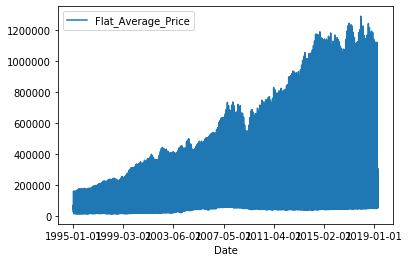

In [13]:
# Plot the flat average price
df.plot('Date',y=['Flat_Average_Price'])
plt.show()

## Data manipulation
Let's say we only want to have the `Flat_Average_Price` from 2010 to 2020

Sometimes you need to convert the Date column in datetime64 dtype so you can use dates more effectively, this can be done with statement similar to this: 
`df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")`

In [15]:
# Finally we can only grab the 2018 rows where region name is England
start_date = '2018-01-01'
end_date = '2018-12-31'
search = (df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['Region_Name'] == 'England')

df[search].size

98040

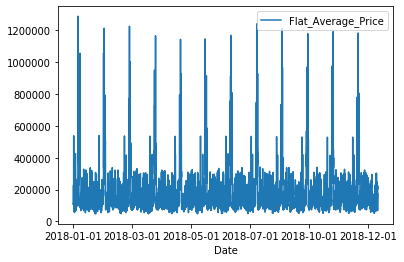

In [16]:
# Let's plot it again
df[search].plot('Date',y=['Flat_Average_Price'])
plt.show()

## Saving on S3
The beauty of panda is that can automatically save the DataFrame as csv file in an S3 bucket with the following statement.

In [17]:
df.to_csv('s3://YOUR_BUCKET_NAME/YOUR_FILENAME.csv')

PermissionError: Access Denied